### Section 4

In [3]:
# Show all output at notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

df = pd.read_csv('houseRent.csv')
df

df.describe()

df['Rent']




0      81000
1      57000
2     116000
3      51000
4     114000
       ...  
95     80000
96    113000
97     86000
98     97000
99     55000
Name: Rent, Length: 100, dtype: int64

<Axes: >

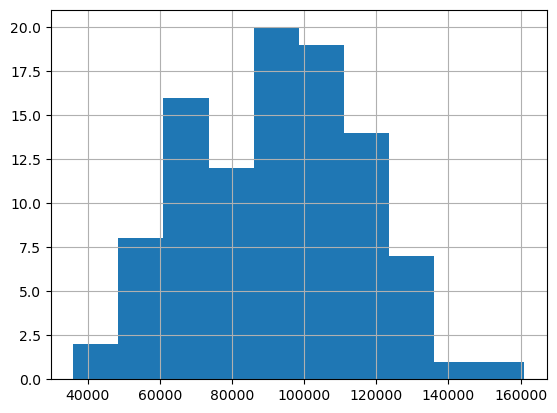

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt 

df["Rent"].hist()

In [5]:
# Cross Tabulation

pd.crosstab(df["Structure"], df["Orientation"])

Orientation,East,South,West
Structure,,,
NonWooden,12,30,19
Wooden,12,9,18


In [6]:
pd.crosstab([df["Structure"], df["Orientation"]], df["Rent category"])


Rent category          High  Low  Medium
Structure Orientation                   
NonWooden East            7    1       4
          South          17    1      12
          West           12    2       5
Wooden    East            0    6       6
          South           0    3       6
          West            1    6      11

In [9]:
pd.pivot_table(df, index=["Structure", "Orientation", "Rent category"], margins=True)

Distance           Rent       Size
Structure Orientation Rent category                                      
NonWooden East        High           598.571429  110142.857143  32.714286
                      Low            950.000000   66000.000000  23.000000
                      Medium         410.000000   86750.000000  25.250000
          South       High           507.058824  117529.411765  32.941176
                      Low            580.000000   57000.000000  16.000000
                      Medium         556.666667   90750.000000  25.666667
          West        High           409.166667  117750.000000  32.166667
                      Low            805.000000   49000.000000  17.000000
                      Medium         418.000000   91200.000000  26.400000
Wooden    East        Low            661.666667   56333.333333  27.000000
                      Medium         401.666667   83666.666667  30.500000
          South       Low            633.333333   61333.333333  25.000000
                      Medium         531.666667   86666.666667  33.000000
          West        High           190.000000  108000.000000  37.000000
                      Low            578.333333   59833.333333  27.833333
                      Medium         444.545455   79545.454545  30.454545
All                                  512.900000   91810.000000  29.460000

In [10]:
pd.get_dummies(df, columns=["Structure" ,"Orientation"])

,Distance,Size,Rent,Rent category,Structure_NonWooden,Structure_Wooden,Orientation_East,Orientation_South,Orientation_West
0,850,37,81000,Medium,False,True,False,False,True
1,580,16,57000,Low,True,False,False,True,False
2,700,35,116000,High,True,False,False,True,False
3,950,29,51000,Low,False,True,False,False,True
4,870,36,114000,High,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
95,640,26,80000,Medium,True,False,True,False,False
96,500,33,113000,High,True,False,False,True,False
97,860,29,86000,Medium,True,False,False,True,False
98,530,26,97000,Medium,True,False,False,True,False


In [11]:
df_dummy = pd.get_dummies(df, drop_first=True, columns=["Structure", "Orientation"])
df_dummy

,Distance,Size,Rent,Rent category,Structure_Wooden,Orientation_South,Orientation_West
0,850,37,81000,Medium,True,False,True
1,580,16,57000,Low,False,True,False
2,700,35,116000,High,False,True,False
3,950,29,51000,Low,True,False,True
4,870,36,114000,High,False,True,False
...,...,...,...,...,...,...,...
95,640,26,80000,Medium,False,False,False
96,500,33,113000,High,False,True,False
97,860,29,86000,Medium,False,True,False
98,530,26,97000,Medium,False,True,False


In [12]:
df_data = df_dummy.replace({"Low":0, "Medium":1, "High":2})
df_data 

,Distance,Size,Rent,Rent category,Structure_Wooden,Orientation_South,Orientation_West
0,850,37,81000,1,True,False,True
1,580,16,57000,0,False,True,False
2,700,35,116000,2,False,True,False
3,950,29,51000,0,True,False,True
4,870,36,114000,2,False,True,False
...,...,...,...,...,...,...,...
95,640,26,80000,1,False,False,False
96,500,33,113000,2,False,True,False
97,860,29,86000,1,False,True,False
98,530,26,97000,1,False,True,False


<Axes: xlabel='Size', ylabel='Rent'>

<Axes: xlabel='Distance', ylabel='Rent'>

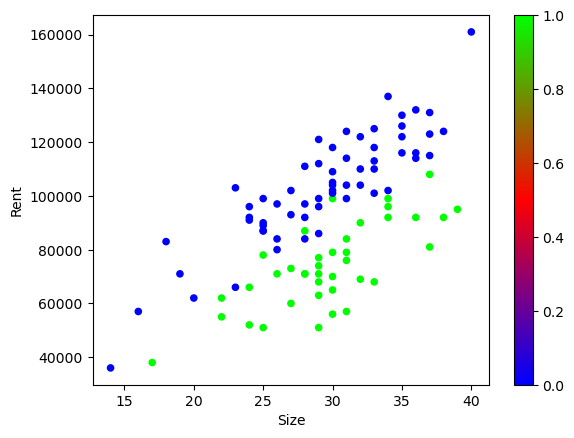

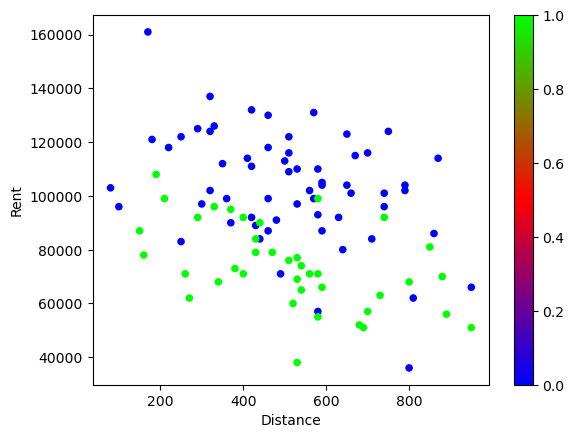

In [14]:
df_data.plot(kind='scatter' ,x='Size', y="Rent", c=df_data["Structure_Wooden"], cmap='brg')

df_data.plot(kind='scatter' ,x='Distance', y="Rent", c=df_data["Structure_Wooden"], cmap='brg')

In [15]:
import numpy as np 
from sklearn.linear_model import LinearRegression

sr_y = df_data["Rent"]
df_x = df_data[["Distance", "Size", "Structure_Wooden", "Orientation_South", "Orientation_West"]]
reg = LinearRegression()
reg.fit(df_x, sr_y)

print(reg.coef_)
print(reg.intercept_)
print(reg.score(df_x, sr_y))




LinearRegression()

[   -43.72174032   3109.4769252  -29079.6182432    4225.09964523
   -244.11759189]
32413.276157478394
0.9465045725580867


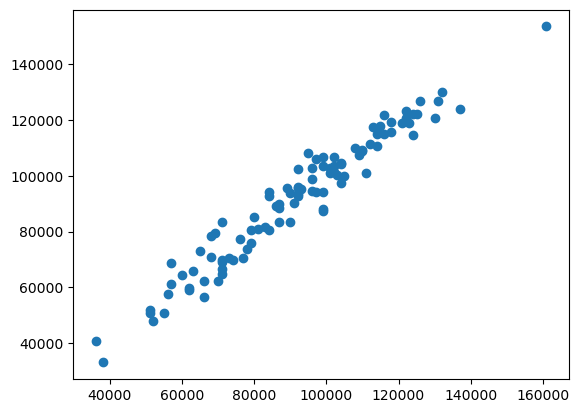

In [16]:
import array


array_yhat = reg.predict(df_x)
plt.scatter(sr_y, array_yhat)

### Exercise

In [22]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("diagnosis.csv")
df_data = pd.get_dummies(df, drop_first=True)

sr_y = df_data.iloc[:, 6]
df_x = df_data.iloc[:, :6]

LR = LogisticRegression()
LR.fit(df_x, sr_y)

print("{0:.2f}".format(LR.score(df_x, sr_y)))

LogisticRegression()

1.00
